# Lob02 Supervised Learning - Classification - Logistic Regression - Multinomial

## Name: Thantham  Khamyai
## Student ID: 122097

### === Task ===

* Doing **train_test_split** from scratch with Iris data

* create **LogisticRegression*** class, giving optional training methods **{'batch', 'mini-batch', 'stochastic'}** elsewise **raise ValueError**

* Show **training time** for each training method

* Perform a **classification using 3 methods** for {"batch", "mini-batch", "stochastic"}. Also **plot training loss** graph

* Perform model evaluation using **classification_report from sklearn.metrics**

* Discuss your results of **training losses** among three methods and **time taken** to fit models.

## 0. Import Neccessary Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

## 1. Load Dataset and Preprocessing

### 1.1 Load Iris Dataset

Iris Dataset is the dataset of dimensional measurement of each flower component. 3 dimensions of flower were measured including Sepal length, Sepal width and Petal width in unit of centimeters. These is for distinguish flower species name of Setosa, Vesicolor and Virginica.

This lab work aims to use those features to classify the flower name using Multinomial Logistic Regression because of 3 classes of target categories.

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

### 1.2 Extract X, y

This part tried to define which are X and y and examine shapes of each variable set

#### <span style="color:red">Warning: This Excercise solution used 3 features (in tutorial used 2 features), So Result will roughly looks quiet different</span>

In [3]:
X = iris.data[:, :-1]  # we only take the first two features.
y = iris.target  #now our y is three classes thus require multinomial

print(f'Iris data features: {iris.feature_names}')
print(f'Example 5 header of X: \n {X[:5]}')

print(f'Iris target flower: {iris.target_names}')
print(f'All classes of y: \n {np.unique(y)}')

print(f'Shape of X: {X.shape} <- (m , n)')
print(f'Shape of y: {y.shape} <- (m, )')
      

Iris data features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Example 5 header of X: 
 [[5.1 3.5 1.4]
 [4.9 3.  1.4]
 [4.7 3.2 1.3]
 [4.6 3.1 1.5]
 [5.  3.6 1.4]]
Iris target flower: ['setosa' 'versicolor' 'virginica']
All classes of y: 
 [0 1 2]
Shape of X: (150, 3) <- (m , n)
Shape of y: (150,) <- (m, )


### 1.3 Show scatter plot

This block is for visualizing scatter of each feature relationship in each flower class. <br>
This will be visually observe on how the data distribution and relation between each feature looks like

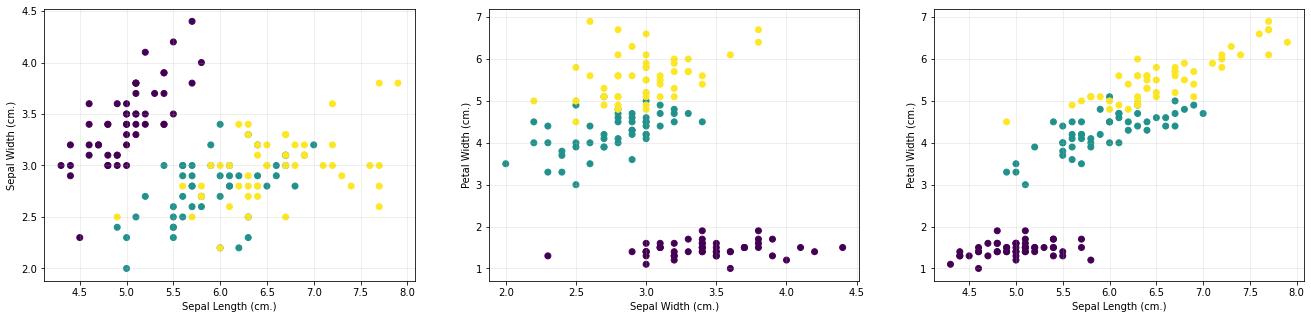

In [4]:
# Make three subplots, in one row and three columns
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(25)
fig.subplots_adjust(left=.2, bottom=None, right=None, top=None, wspace=.2, hspace=.2)
plt1 = plt.subplot(1,3,1)
plt2 = plt.subplot(1,3,2)
plt3 = plt.subplot(1,3,3)

# Plot 1 sep len : sep wid
plt1.scatter(X[:,0], X[:,1] , c=y)

plt1.set_xlabel('Sepal Length (cm.)')
plt1.set_ylabel('Sepal Width (cm.)')
plt1.grid(axis='both', alpha=.25)

# Plot 2 sep wid : pet wid
plt2.scatter(X[:,1], X[:,2] , c=y)
plt2.set_xlabel('Sepal Width (cm.)')
plt2.set_ylabel('Petal Width (cm.)')
plt2.grid(axis='both', alpha=.25)

# Plot 3 sep len : pet wid
plt3.scatter(X[:,0], X[:,2] , c=y)
plt3.set_xlabel('Sepal Length (cm.)')
plt3.set_ylabel('Petal Width (cm.)')
plt3.grid(axis='both', alpha=.25)


### 1.4 Standardize X

For better convergenced capability in term of timing, Scaling will be performed 

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

print(f'X after scaling: \n {X[:5]}')

X after scaling: 
 [[-0.90068117  1.01900435 -1.34022653]
 [-1.14301691 -0.13197948 -1.34022653]
 [-1.38535265  0.32841405 -1.39706395]
 [-1.50652052  0.09821729 -1.2833891 ]
 [-1.02184904  1.24920112 -1.34022653]]


### 1.5 Adding Intercept term and checking shape of X, Y

Add Intercept term using np.insert which **insert '1' at 'index 0' in 'axis = 1' to <u>X</u> matrix**

Then we will see new column for intercept 1 at index 0 columns

Also, shape of X will be **(m, n+1)** after adding intercept

In [6]:
X = np.insert(X, 0, 1, axis=1)

print(f'Shape of X: {X.shape} <- (m , n+1)')
print(f'Shape of y: {y.shape} <- (m, )')
print(f'Example 5 header of X: \n {X[:5]}')

Shape of X: (150, 4) <- (m , n+1)
Shape of y: (150,) <- (m, )
Example 5 header of X: 
 [[ 1.         -0.90068117  1.01900435 -1.34022653]
 [ 1.         -1.14301691 -0.13197948 -1.34022653]
 [ 1.         -1.38535265  0.32841405 -1.39706395]
 [ 1.         -1.50652052  0.09821729 -1.2833891 ]
 [ 1.         -1.02184904  1.24920112 -1.34022653]]


### 1.6 Perform Train Test Split from scratch and Check shape of data

Expected Algorithm:

    random idx of training set
                |
    generate idx of testing set which not in training idx
                |
    split training and testing from X, Y
                |
              return
              
Then implementing train_test_split function. we will see new shape for each X and y

In [19]:
def train_test_split(X, Y, test_size):
    
    # impoer random package
    import random
    
    # randomize idx of sample X by number of test size calculated from test ratio using 'random.sample' function
    idx_train = random.sample(set(np.arange(X.shape[0])), round((1-test_size)*X.shape[0]))
    
    #create idx of test data
    idx_test = np.array([i for i in range(X.shape[0]) if i not in idx_train])
    
    #split X, Y
    X_train = X[idx_train]
    X_test = X[idx_test]
    Y_train = Y[idx_train]
    Y_test = Y[idx_test]

    return X_train, X_test, Y_train, Y_test

# Perform splitting from created function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f'Shape of X_train: {X_train.shape} <- (m , n+1)')
print(f'Shape of Y_train: {y_train.shape} <- (m, )')
print(f'Shape of X_test: {X_test.shape} <- (m , n+1)')
print(f'Shape of Y_test: {y_test.shape} <- (m, )')


Shape of X_train: (105, 4) <- (m , n+1)
Shape of Y_train: (105,) <- (m, )
Shape of X_test: (45, 4) <- (m , n+1)
Shape of Y_test: (45,) <- (m, )


### 1.3 Define function for One-Hot Encoding and Encode

In Multinomial Logistic Regression, y is multiple classes of integer. to classify this by logistic regression, It should be encoded using** One-Hot Encoding** to make it be probabilistic target in **Y shape of (m, k)** whether **m = sample and k = number of probabilistic multi-class** of flower target

<u>Remark</u>: One-Hot Encoding **implement only y_train** for fitting, **classification report needs y_test as interger form** (y_predicted will be output as interger form)

In [8]:
def OneHotEncoding(y, n_feature):
    k = len(set(y))
    m = len(y)
    n = n_feature
    y_encode = np.zeros((m, k))
    for class_i in range(k):
        row_idx = y==class_i
        y_encode[np.where(row_idx), class_i] = 1
    return y_encode

Y_train = OneHotEncoding(y_train, X.shape[1])

print(f'y before encode has shape {y_train.shape}')
print(f'Y after encode has shape {Y_train.shape}')
print(f'y before encode are {y_train[:5]}')
print(f'Y after encode are {Y_train[:5]}')

y before encode has shape (105,)
Y after encode has shape (105, 3)
y before encode are [0 2 0 1 0]
Y after encode are [[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


## 2. LogisticRegression Class Creation

Referring to previous Logistic Regression Class structure, This class also looks similar, but what changes are new use **W matrix instead of theta vector**, change h_theta function to **implement softmax function** in multinomial probailistic for each prediction and cost function to conclude loss value

In [9]:
class LogisticRegression:
    
    def __init__(self,method= 'mini-batch',max_iterations=100000, alpha=0.001, early_stopping=False, tol = 0.0001,
                mini_batch_size = 10, record_history_every = 100, print_loss_every=500):
        self.training_method = method
        self.alpha = alpha
        self.tol = tol
        self.early_stopping = early_stopping
        self.max_iterations = max_iterations
        self.training_history = []
        self.batch_size = mini_batch_size
        self.epoch_to_record_history = record_history_every
        self.epoch_to_print = print_loss_every
        self.previous_loss = 10000
        self.stop_epoch = 0
        self.fitting_time = 0
        
        if self.training_method not in ['batch', 'mini-batch', 'stochastic']:
            raise ValueError('''method defined not match any available: 'batch','mini-batch','stchastic' ''')
        
    def fit(self, X, Y):
        
        # 1 initiaite W, idx for stochastic, and time 
        self.W = self.initiate_W(X.shape[1], Y.shape[1])
        idx_used = []
        time_start = time.time()
        
        # 2 Perform Looping learning
        for i in range(self.max_iterations):
            
            # 2.1 condition to choose method
            if self.training_method=='batch':
                # pass all samples
                x_to_train = X # dump all x
                y_to_train = Y # dump sll y

            elif self.training_method=='stochastic': # <= With Replacement
                # randomly select 1 sample
                select_idx = np.random.randint(X.shape[0])# random idx
                while select_idx in idx_used:
                    select_idx = np.random.randint(X.shape[0])# random idx
                    
                x_to_train = np.array([X[select_idx, :]]) # extract one X by idx 
                y_to_train = np.array([Y[select_idx]]) # extract one y by idx
                
                idx_used.append(select_idx)
                
                if len(idx_used) == X.shape[0]:
                    idx_used = []

            elif self.training_method=='mini-batch':
                # randomly select portion of samples following predefined mini batch size
                select_start_idx = np.random.randint(X.shape[0] - self.batch_size) # random starting idx
                x_to_train = X[select_start_idx:select_start_idx + self.batch_size, :] # extract portion of X
                y_to_train = Y[select_start_idx:select_start_idx + self.batch_size] # extract portion of y

            else:
                raise ValueError('''method defined not match any available: 'batch','mini-batch','stochastic' ''')
                
            # 2.3 calculate gradient and loss of current iteration    
            current_loss, grad = self.gradient(x_to_train, y_to_train)
            
            # 2.4 if diffence of current and previous loss less than tolerance -> stop fitting
            if self.early_stopping & (np.abs(self.previous_loss - current_loss) < self.tol):
                self.stop_epoch = i # keep early stopping iteration in stop_epoch variable
                # print early stopped epoch and exit loop
                print(f'early_stopped at epoch: {i+1}')
                print(f'training latest loss: {self.previous_loss}')
                break
            
            # 2.5 record current loss to be precious loss
            self.previous_loss = current_loss
            
            # 2.6 Update W
            self.W = self.W - self.alpha * grad
            
            # add history loss
            if i % self.epoch_to_record_history == 0: # if this iteration is every ... for recording loss
                self.training_history.append(current_loss) # save this loss
            
            # print current loss
            if i % self.epoch_to_print == 0: # if this iteration is every ... for printing loss
                print(f'loss at epoch {i}: {current_loss}') # print current iteration loss'
                
        self.fitting_time = time.time() - time_start
        self.stop_epoch = i # if no early stopping -> keep last iteration number to stop_epoch
        print(f'fitting model completed by loss: {current_loss}') 
        print(f'fitting time: {round(self.fitting_time, 3)} seconds')
            
            
        
    def gradient(self, X, Y):
        h = self.h_theta(X) # predict h_theta
        cost = - np.sum(Y * np.log(h)) / X.shape[0] # calculate cost  -> - sum( Y - log(h) ) / m
        error = h - Y # calcualte error (yhat - y)
        grad = self.softmax_grad(X, error) # calculate gradient to optimize W
        return cost, grad
        
    def softmax(self, X_dot_W):
        return np.exp(X_dot_W) / np.sum(np.exp(X_dot_W), axis=1, keepdims=True) # e^h / sum( e^h )
    
    def softmax_grad(self, X, error):
        return np.dot(X.T, error) # (yhat - y)x
    
    def h_theta(self, X):
        return self.softmax(np.dot(X, self.W)) # X dot W and pass to softmax function
    
    def initiate_W(self, n, k):
        return np.zeros((n, k)) # make W matrix of full of 0
        
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test), axis=1) # reverse interger class from one-hot classes
    
    def show_learning_graph(self):
        
        if len(self.training_history) == 0: # if no loss in history list
            print('hitory is empty!, fit model before!')
        else: # else show learning curve
            plt.plot(np.arange(start = 1, stop = self.stop_epoch, step=self.epoch_to_record_history) , self.training_history, label = "Train Losses")
            plt.title("Losses thourgh learning curve")
            plt.xlabel("number of epoch")
            plt.ylabel("losses")
            plt.legend()
        
       

## 3. Performing Classification

### 3.1 Instantiate LosgisticRegression Model

This part is just for performing classification using create class with class parameters of 'mini-batch' training method and activate early stopping

In [10]:
model = LogisticRegression(method= 'mini-batch',max_iterations=150000, alpha=0.0003, early_stopping=True, tol = 1e-6,
                mini_batch_size = 30, record_history_every = 100, print_loss_every=2000)

### 3.2 Fitting Model

The fitting has set to print loss every 1000 epochs and record training history every 100 epochs Then show training graph

loss at epoch 0: 1.0986122886681098
loss at epoch 2000: 0.40906677513520295
loss at epoch 4000: 0.2892397566000717
loss at epoch 6000: 0.22616889546888305
loss at epoch 8000: 0.251494875546524
loss at epoch 10000: 0.20995420210353946
loss at epoch 12000: 0.20966936508959882
loss at epoch 14000: 0.2384083484729111
loss at epoch 16000: 0.1866146080975442
loss at epoch 18000: 0.20127134934113475
loss at epoch 20000: 0.19953259524448694
loss at epoch 22000: 0.18267796925119073
early_stopped at epoch: 23723
training latest loss: 0.14728151534939263
fitting model completed by loss: 0.14728086923093822
fitting time: 1.887 seconds


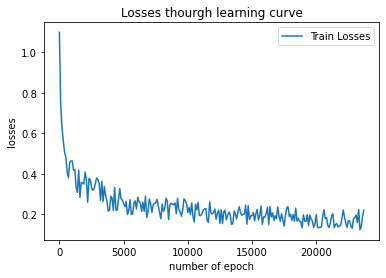

In [11]:
model.fit(X_train, Y_train) # fitting
model.show_learning_graph() # call show history function (make this to callable in the main class)

From training, The training was **fitting stopped at epoch which different loss not over than tolerance value**

## 4. Model Evaluation

### 4.1 Predict y_predicted

From model created, predict function was made for **predict output of interger form** (not one-hot form) because when we check metrics, classes should be interger indicator classes (should not be one-hot class indicator)
<br>

We can see how reverse One-Hot encoded back to interger class in predict function which use **np.argmax to return the index of max probability value from predicted output** in h_theta function

In [12]:
y_pred = model.predict(X_test) # This will return integer form of classes
print(f'result of y_predicted: \n {y_pred[:]}')

result of y_predicted: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 2 2 2 2 2
 2 2 2 2 2 2 2 2]


### 4.2 Evaluate Result using classification_report imported from sklearn.metrics

Shortly, we use classification report from sklearn.metrics package. However, in code, we just put y_test to compare with y_pred which they are interger form of classes because in step of OneHot encoding, **we encodeed only y_train (m, ) to be Y_train (m, k)**, not for y_test

<br> So that,we can put y_test directly to classification report function, then we will see class labels as **0,1,2 which stand for ['setosa' 'versicolor' 'virginica']**

In [13]:
from sklearn.metrics import classification_report

print(f'Classification Report: \n {classification_report(y_test, y_pred)}')

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.94      0.94        16
           2       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## 5. Implement Training model for different method and Discussion


This section will perform classification following Lab work Tasks to do as

* Perform 3 training method classification **'batch', 'mini-batch', 'stochastic'**
* use train_test_split implemented **X_train, X_test, Y_train (encoded) and y_test from previous execution**
* Show **Classification Report**, **Fitting time** and **Plot training losses** for each training method
* Dicussion on result and what are considerations

<u>Remark: </u> To dicuss result among 3 models, early_stopping will not be set, other training parameters will be the same except training method

### 5.1 Instantiate models for diferrent training method

Training method are separated, and iterations is 30,000 with alpha.0003, deactivated early stopping option altough tol has set, record history every 30 iterations and print loss evenly 2,000 iterations

### <span style="color:red">In case of method is not match any</span>

In [14]:
model_batch = LogisticRegression(method= 'batch is the best',max_iterations=30000, alpha=0.0003, early_stopping=False, tol = 1e-6,
                record_history_every =30, print_loss_every=2000)

ValueError: method defined not match any available: 'batch','mini-batch','stchastic' 

### <span style="color:green">Doing instantiate model properly</span>

In [15]:
model_batch = LogisticRegression(method= 'batch',max_iterations=30000, alpha=0.0003, early_stopping=False, tol = 1e-6,
                record_history_every =30, print_loss_every=2000)

model_mini = LogisticRegression(method= 'mini-batch',max_iterations=30000, alpha=0.0003, early_stopping=False, tol = 1e-6,
                mini_batch_size = 30, record_history_every = 30, print_loss_every=2000)

model_sto = LogisticRegression(method= 'stochastic',max_iterations=30000, alpha=0.0003, early_stopping=False, tol = 1e-6,
                record_history_every = 30, print_loss_every=2000)

### 5.2 Fitting all models

#### 5.2.1 batch gradient descent training

loss at epoch 0: 1.0986122886681098
loss at epoch 2000: 0.24108792783538632
loss at epoch 4000: 0.18914022062561545
loss at epoch 6000: 0.16366906552249325
loss at epoch 8000: 0.1485563706592071
loss at epoch 10000: 0.13854785325087238
loss at epoch 12000: 0.13142223548445509
loss at epoch 14000: 0.12608428945636388
loss at epoch 16000: 0.12193261664275053
loss at epoch 18000: 0.1186095354224878
loss at epoch 20000: 0.11588883051542406
loss at epoch 22000: 0.11362029511513998
loss at epoch 24000: 0.1117001772468021
loss at epoch 26000: 0.11005443738950418
loss at epoch 28000: 0.10862877334949496
fitting model completed by loss: 0.10738300437126652
fitting time: 2.224 seconds
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.94      0.94        16
           2       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       

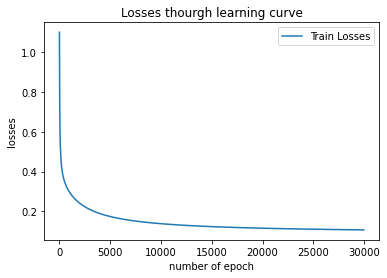

In [16]:
model_batch.fit(X_train, Y_train) # 1. Fitting
model_batch.show_learning_graph() # 2. Show training losses
y_batch_pred = model_batch.predict(X_test) # 3. predict y to compare with actual y
print(f'Classification Report: \n {classification_report(y_test, y_batch_pred)}') #print report

**<u>Batch gradient descent</u>**

Considerations:

1) Completed 30,000 iterations within ~2 seconds<br>
2) Training curve graph looks very stable and not much significant change of loss after 5000-10,000 iterations<br>
3) Classification metrics showed very good for classifying Iris data<br>

#### 5.2.2 mini-batch gradient descent training

loss at epoch 0: 1.0986122886681098
loss at epoch 2000: 0.38118508555870023
loss at epoch 4000: 0.3339954037950777
loss at epoch 6000: 0.2898274061381072
loss at epoch 8000: 0.2550817976736971
loss at epoch 10000: 0.2335809845057702
loss at epoch 12000: 0.16982528846403336
loss at epoch 14000: 0.2489227747896376
loss at epoch 16000: 0.2072602339044721
loss at epoch 18000: 0.18407942127084506
loss at epoch 20000: 0.19575099336686075
loss at epoch 22000: 0.14712695874098725
loss at epoch 24000: 0.18047368916633688
loss at epoch 26000: 0.19331784421774179
loss at epoch 28000: 0.13349112390686113
fitting model completed by loss: 0.13054515421077967
fitting time: 2.455 seconds
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.94      0.94        16
           2       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.9

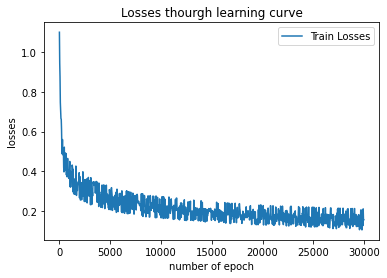

In [17]:
model_mini.fit(X_train, Y_train) # 1. Fitting
model_mini.show_learning_graph() # 2. Show training losses
y_mini_pred = model_mini.predict(X_test) # 3. predict y to compare with actual y
print(f'Classification Report: \n {classification_report(y_test, y_mini_pred)}') #print report

**<u>Mini-Batch gradient descent</u>**

Considerations:

1) Completed 30,000 iterations within ~2 seconds<br>
2) Training curve graph looks potentially unstable after decreasing loss lower than 0.4 and not much significant change of loss after 10,000 iterations<br>
3) Classification metrics showed statifsying for classifying Iris data<br>

#### 5.2.3 stochastic gradient descent training

loss at epoch 0: 1.0986122886681098
loss at epoch 2000: 0.795158239821472
loss at epoch 4000: 0.3968420485933217
loss at epoch 6000: 0.2936914559509471
loss at epoch 8000: 1.254790291144449
loss at epoch 10000: 0.9685951784756022
loss at epoch 12000: 0.5989177159576209
loss at epoch 14000: 0.747127601771642
loss at epoch 16000: 1.025354939262359
loss at epoch 18000: 0.8533788330946587
loss at epoch 20000: 0.11589390037509577
loss at epoch 22000: 0.6902137440545962
loss at epoch 24000: 0.7697735210210093
loss at epoch 26000: 0.01705642436993027
loss at epoch 28000: 0.5429699154054477
fitting model completed by loss: 0.7333574981107482
fitting time: 3.274 seconds
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.75      0.56      0.64        16
           2       0.65      0.81      0.72        16

    accuracy                           0.78        45
   macro avg       0.80      0.79

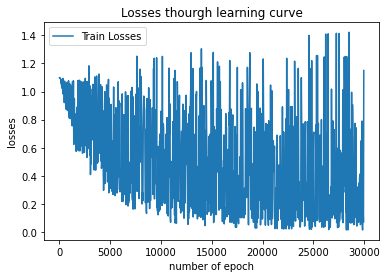

In [18]:
model_sto.fit(X_train, Y_train) # 1. Fitting
model_sto.show_learning_graph() # 2. Show training losses
y_sto_pred = model_sto.predict(X_test) # 3. predict y to compare with actual y
print(f'Classification Report: \n {classification_report(y_test, y_sto_pred)}') #print report

**<u>Stochastic gradient descent</u>**

Considerations:

1) Completed 30,000 iterations within ~3 seconds<br>
2) Training curve graph looks dramatically variant and difficult to stably converged even through 30,000 eiterations<br>
3) Classification metrics showed fair for classifying Iris data<br>

### Result Discussion among training method for Multinomial Logistic Regression by Iris Data

* Clasification Result
    + The overall we can roughly looks is Accuracy. Batch training method showed very good result at ~0.9 even Precision, Recall and F1 score. next 1st runner-up is Mini-Batch method which provided ~0.9 Accuracy, but it performed not good as best one. This is because we did not take all training X to perform minimize loss, so some training X set might be repeatitively taken to tune up W, but some X very less times to be calculate new W. This is one of a bias aspect to train the model. Nevertheless, stochastic gave considerable result. This is because although no replacement implemented a sample took to calculate new W is less times. So, if we want to make stochastic converge properly, it needs to be more iterations to reach that point.

    <br>
* Time to fit
    + Although Batch method provided fastest training time but Mini-Batch also perform approximately around ~2-3 second with Iris data which has 105 training data (70:30 split). This may be because process will spend some time to execute splitting X data to train despite no splitting process for Batch. In constrast, Stochastic performed taking time more than others (>3 seconds) because no replacement approach to select training X, and it also need to do several steps before excecute gradient function 
    
    <br>
* Training loss Gragh
    + It is true that Batch method should provide best stability of curve due to taking all training to tune W. However, Stochastic method should be therotical better, but it visually perform very variant during training because it has to select only 1 training X to tune whole W set. This cause difficulty to converged good result in less number of training. If it perform on large dataset, it could be better in term of training time and converged cost (computational cost). For Mini-Batch, it took both advantages from Batch and Stochastic to select a portion of training X set to tune W up properly. This brings about decrease computaional cost and suitable convergence cappability comparing to the bad aspect of Batch method and good aspect of Stchastic method 

    <br>
* Overall and conclusion
    + Even though all method have thier own issues to consider, we should realzie the capability of them and selecct the best one for better study. For practical study, large dataset will cause directly to the reason to choose training method. Eventually, Mini-Batch should be prioritized to be a choice to perform in any ML problem. To decrease bad side of Batch, and rise good side of stochastic. We should think suitable one to be used